In [3]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append('../src')
sys.path.append('../data')
import  semantic_analysis, vis_sentiment #, helper
import os

In [ ]:

# Define the path
base_path = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA"

In [ ]:

# Loop through years from 2014 to 2019
for year in range(2014, 2017):

    file_path = os.path.join(base_path, f"fox_{year}_output.csv")
    
    # Check if the file exists for the given year
    if os.path.exists(file_path):
        # Read the CSV file
        #semantic_analysis.lexicon_nltk(file_path)
        semantic_scores_roberta = semantic_analysis.roberta_semantic_algorithm_twitter(file_path)
        
        print(f"File saved for year {year}")
    else:
        print(f"No file found for year {year}")
#'''

In [3]:
base_path = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\SEMANTICS"
# Loop through years from 2014 to 2019
for year in range(2014, 2020):
    file_path = os.path.join(base_path, f"cnn_{year}_semantics.csv")
    df = pd.read_csv(file_path)
    print(f'Classification in CNN {year}:\n', df['Semantic roberta twitter'].value_counts())
    

Classification in CNN 2014:
 negative    2
neutral     2
positive    1
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2015:
 neutral     13028
negative     6898
positive     1510
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2016:
 neutral     14410
negative     7278
positive     1526
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2017:
 neutral     16414
negative     7195
positive     1439
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2018:
 neutral     18736
negative     8207
positive     1829
Name: Semantic roberta twitter, dtype: int64
Classification in CNN 2019:
 neutral     24502
negative     9784
positive     3418
Name: Semantic roberta twitter, dtype: int64


In [ ]:
for year in range(2014, 2020):
    file_path = os.path.join(base_path, f"fox_{year}_semantics.csv")
    df = pd.read_csv(file_path)
    print(f'Classification in fox {year}:\n', df['Semantic roberta twitter'].value_counts())

Classification in fox 2014:
 neutral     7541
negative    2852
positive    1142
Name: Semantic roberta twitter, dtype: int64
Classification in fox 2015:
 neutral     9658
negative    4254
positive    1831
Name: Semantic roberta twitter, dtype: int64
Classification in fox 2016:
 neutral     9735
negative    5535
positive    1797
Name: Semantic roberta twitter, dtype: int64


MERGING SENTIMENT TO MASTER FILE

In [11]:
large_file_path = r'C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_word2vec.csv'
large_df = pd.read_csv(large_file_path)

#adding sentiment of journla s to one single df for posterior merge. Rest of journals were merged by other collegues
data_df = pd.DataFrame()
for year in range(2014,2020):
    file_path = os.path.join(base_path, f"cnn_{year}_output.csv")
    journal_sentiment = pd.read_csv(file_path)
    data_df = data_df.append(journal_sentiment)

    if year<=2016:
        file_path = os.path.join(base_path, f"fox_{year}_output.csv")
        journal_sentiment = pd.read_csv(file_path)
        data_df = data_df.append(journal_sentiment)


C:\Users\storr\AppData\Local\Temp\ipykernel_40116\891297499.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(journal_sentiment)
C:\Users\storr\AppData\Local\Temp\ipykernel_40116\891297499.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(journal_sentiment)
C:\Users\storr\AppData\Local\Temp\ipykernel_40116\891297499.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(journal_sentiment)
C:\Users\storr\AppData\Local\Temp\ipykernel_40116\891297499.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(journal_sentiment)
C:\Users\storr\App

In [12]:
large_df = semantic_analysis.merge_data(large_df, data_df, column = 'Semantic roberta twitter' )
large_df = large_df.drop('Text', axis=1)
large_df.to_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_and_semantics.csv")
print(large_df.isna().sum())

TypeError: merge_data() got an unexpected keyword argument 'column'

SENTIMENT VISUALIZATION PER ORGANIZATION


28673
neutral     0.486047
positive    0.393875
negative    0.120079
Name: Semantic roberta twitter, dtype: float64
150435
100.0
100.00000000000001
100.0


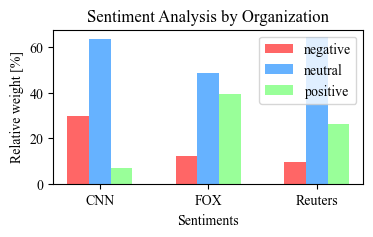

In [2]:
master_file_df = pd.read_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_and_semantics.csv")
fox_master = master_file_df[master_file_df['Organization']=='FOX']
print(fox_master['Semantic roberta twitter'].isna().sum())
print(fox_master['Semantic roberta twitter'].value_counts()/(len(fox_master)-fox_master['Semantic roberta twitter'].isna().sum()))
print(len(fox_master))
vis_sentiment.sentiment_count_graph(master_file_df)

COMPARISON WITH LLM

In [4]:
sampling_articles = pd.read_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\sampling_articles.csv")
sentiment_chatgpt = pd.read_csv(r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\sentiment_chatgpt.csv", header = None)
sentiment_chatgpt.columns = ['sentiment chatgpt']

num_articles_analyzed = len(sentiment_chatgpt)

sampling_articles = sampling_articles[0:num_articles_analyzed]
sampling_articles = pd.concat([sampling_articles, sentiment_chatgpt], axis=1)
#sampling_articles_headlines = sampling_articles['Headline'][0:num_articles_analyzed]

#master_sampling_articles = master_file_df[master_file_df['Headline'].isin(sampling_articles_headlines )]
#master_sampling_articles


sampling_articles['lexicon vs chatgpt'] = sampling_articles['Sentiment lexicon'] == sampling_articles['sentiment chatgpt']
sampling_articles['roberta vs chatgpt'] = sampling_articles['Semantic roberta twitter'] == sampling_articles['sentiment chatgpt']

comparison_lexicon = sampling_articles['lexicon vs chatgpt'].value_counts()/num_articles_analyzed
comparison_roberta = sampling_articles['roberta vs chatgpt'].value_counts()/num_articles_analyzed

print(comparison_lexicon)
print(comparison_roberta)
print(sampling_articles)

False    0.588235
True     0.411765
Name: lexicon vs chatgpt, dtype: float64
False    0.570588
True     0.429412
Name: roberta vs chatgpt, dtype: float64
     Unnamed: 0.1  Unnamed: 0     ID  \
0          264499      264499  11941   
1           20812       20812  20799   
2          127659      127659   4538   
3          418667      418667   8333   
4           35844       35844  12568   
..            ...         ...    ...   
165        409283      409283  36644   
166        285767      285767  12482   
167        285501      285501  12206   
168        434671      434671  24352   
169        285400      285400  12102   

                                              Headline  \
0    American Airlines plane reports emergency, ret...   
1    Nicole Kidman’s second awkward Jimmy Fallon in...   
2       World's fastest land animal is incredibly tiny   
3    Bernie Sanders hits head on shower door, recei...   
4                     Lord & Taylor may go up for sale   
..               

In [ ]:
# Define the path
base_path = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA"

file_path = os.path.join(base_path, f"updated_dataframe_with_clusters_word2vec.csv")

# Check if the file exists for the given year
if os.path.exists(file_path):
    # Read the CSV file
    #semantic_analysis.lexicon_nltk(file_path)
    semantic_scores_roberta = semantic_analysis.roberta_semantic_algorithm_twitter(file_path)
    print('Roberta has completed')
    

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Roberta has completed


In [4]:
clusters_file = r"C:\Users\storr\OneDrive - Danmarks Tekniske Universitet\Year 1\Semester 1\Computational Tools for Data Science\Project\DATA\updated_dataframe_with_clusters_word2vec.csv"

lexicon_articles = semantic_analysis.lexicon_nltk(clusters_file)


KeyboardInterrupt: 